# Machine Learning Project


### Imports

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Training and Testing Sets

In [20]:
df = pd.read_excel(r'./titanicData.xlsx')
dfX = df.drop(columns=['Sex', 'Siblings', 'Fare', 'Embarked', 'Survived'])
sy = df.Survived

In [21]:
from sklearn.model_selection import train_test_split
dfX_train, dfX_test, sy_train, sy_test = train_test_split(dfX, sy)

### Data Preprocessing

In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le = le.fit(sy_train)
le.classes_
y_train = le.transform(sy_train.to_numpy())

### MinMaxScaler()

In [23]:
nl = preprocessing.MinMaxScaler()
nl = nl.fit(dfX_train.to_numpy())
X_train = nl.transform(dfX_train.to_numpy())

In [24]:
X_train.shape

(186, 2)

### KNN Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn = knn.fit(X_train, y_train)
print(knn)

KNeighborsClassifier(n_neighbors=1)


### Evaluation of the model

In [26]:
y_test = le.transform(sy_test.to_numpy())
X_test = nl.transform(dfX_test.to_numpy())
print(knn.predict(X_test))
print(y_test)

[0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1]
[0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0]


### k values from 1 to 14

In [27]:
dfX_train, dfX_test, sy_train, sy_test = train_test_split(dfX, sy, test_size=0.25, random_state=42)
data = []
for i in range(1,15,1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_score = knn.score(X_train,y_train)
    data.append((i, test_score ,train_score))
df = pd.DataFrame(data, columns=['K','Test Score','Train Score'])
print(df)

     K  Test Score  Train Score
0    1    0.460317     0.801075
1    2    0.634921     0.725806
2    3    0.523810     0.736559
3    4    0.619048     0.693548
4    5    0.555556     0.698925
5    6    0.555556     0.698925
6    7    0.555556     0.666667
7    8    0.571429     0.650538
8    9    0.555556     0.661290
9   10    0.587302     0.655914
10  11    0.555556     0.650538
11  12    0.587302     0.629032
12  13    0.587302     0.623656
13  14    0.587302     0.618280


### Plotting the data

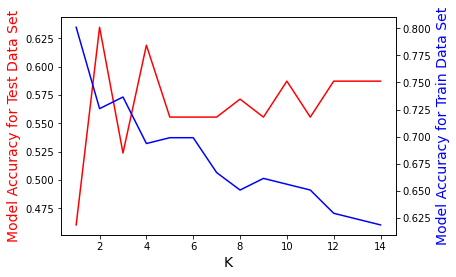

In [28]:
fig,ax = plt.subplots()

ax.plot(df.iloc[:,0], df.iloc[:,1], color="red")

ax.set_xlabel("K", fontsize = 14)

ax.set_ylabel("Model Accuracy for Test Data Set", color="red", fontsize=14)

ax2=ax.twinx()

ax2.plot(df.iloc[:,0], df.iloc[:,2],color="blue")
ax2.set_ylabel("Model Accuracy for Train Data Set", color="blue", fontsize=14)
plt.show()

### Using standard scalar

In [29]:
stand = preprocessing.StandardScaler()
standfitted = stand.fit(dfX_train.to_numpy())
X_train = standfitted.transform(dfX_train.to_numpy())

### Training the model

In [30]:
dfX_train, dfX_test, sy_train, sy_test = train_test_split(dfX, sy, test_size=0.25, random_state=42)
data = []
for i in range(1,15,1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_score = knn.score(X_train, y_train)
    data.append((i, test_score ,train_score))
df = pd.DataFrame(data, columns=['K','Test Score','Train Score'])
print(df)

     K  Test Score  Train Score
0    1    0.444444     0.763441
1    2    0.571429     0.698925
2    3    0.444444     0.704301
3    4    0.460317     0.655914
4    5    0.444444     0.661290
5    6    0.507937     0.677419
6    7    0.412698     0.693548
7    8    0.380952     0.655914
8    9    0.380952     0.682796
9   10    0.380952     0.677419
10  11    0.380952     0.688172
11  12    0.396825     0.655914
12  13    0.412698     0.661290
13  14    0.428571     0.661290


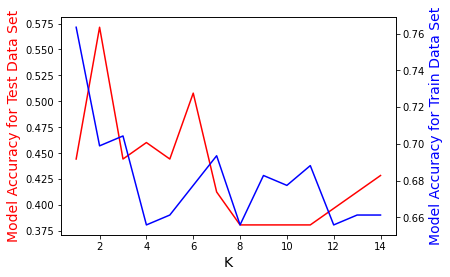

In [31]:
fig,ax = plt.subplots()

ax.plot(df.iloc[:,0], df.iloc[:,1], color="red")

ax.set_xlabel("K", fontsize = 14)

ax.set_ylabel("Model Accuracy for Test Data Set", color="red", fontsize=14)

ax2=ax.twinx()

ax2.plot(df.iloc[:,0], df.iloc[:,2],color="blue")
ax2.set_ylabel("Model Accuracy for Train Data Set", color="blue", fontsize=14)
plt.show()

### Building The Model

In [32]:
X_train.shape

(186, 2)

In [33]:
nl = preprocessing.MinMaxScaler() # MinMax Scalar is chosen
nl = nl.fit(dfX_train.to_numpy())
X_train = nl.transform(dfX_train.to_numpy())
knn = KNeighborsClassifier(n_neighbors=1) # k value of 1 is chosen
knn = knn.fit(X_train, y_train)
knn

KNeighborsClassifier(n_neighbors=1)

### Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(sy_train, y_train)
confusion_matrix

array([[74, 46],
       [40, 26]])